## Use AIC to decide whether or not to include $\Delta C_{p}$ in model

In [1]:
%matplotlib inline
import pytc

### Our results depend on our confidence in our measured heats.  

Origin does not return an uncertainty, so we have to estimate the uncertainty ourselves.  This can be done by setting a constant uncertainty for the experiment.  The value of `HEAT_UNCERTAINTY` below lets us select between being able to resolve $\Delta C_{p}$ (`HEAT_UNCERTAINTY = 0.1`) or not (`HEAT_UNCERTAINTY = 1.0`). 

In [9]:
#HEAT_UNCERTAINTY = 0.1 #cal/mol; Favors dCp
HEAT_UNCERTAINTY = 1.0 #cal/mol; Favors no dCp

#### Fit to the VantHoff global connector to extract van't Hoff Enthalpy
Titrations of recombinant human S100A14 with $ZnCl_{2}$ at $5$, $10$, $17$, $25$, $30$ and $35 ^{\circ}C$.  Concentrations were: $[protein] = 110\ \mu M$ and $[ZnCl_{2}]=200\ mM$.  Buffer was $25\ mM$ Trizma, $100\ mM$ NaCl, $pH\ 7.4$.  Buffer was treated with chelex and filtered to $0.22\ \mu m$.  Data collected using a GE ITC200. 

# Fit successful? True
# 2017-05-15 14:30:31.250087
# Units: cal/mol
# Fit type: bayesian
#   bayesian: Burn in: 0.1
#   bayesian: Final sample number: 90000
#   bayesian: Initial walker spread: 0.0001
#   bayesian: Num steps: 1000
#   bayesian: Num threads: 1
#   bayesian: Num walkers: 100
#   bayesian: Use ML guess: True
# AIC: 52.08341688334751
# AICc: 62.28341688334751
# BIC: 89.79075811038098
# F: 1594.7094971323415
# Rsq: 0.9974026639461365
# Rsq_adjusted: 0.9967742761911695
# df: 63
# ln(L): -10.041708441673753
# num_obs: 78
# num_param: 15
type,name,exp_file,value,stdev,bot95,top95,fixed,guess,lower_bound,upper_bound
global,vh_dH_vanthoff,NA,-6.15331e+03,6.81253e+02,-7.55474e+03,-4.64386e+03,False,0.00000e+00,-inf,inf
global,g_competent,NA,1.41699e+00,7.18260e-02,1.23143e+00,1.49723e+00,False,1.00000e+00,5.00000e-01,1.50000e+00
global,vh_K_ref,NA,9.20440e+03,1.59798e+03,6.30491e+03,1.26811e+04,False,1.00000e+04,1.00000e+00,inf
local,dilution_heat,temp-dependence/5C.DH,1.44920e+

/usr/local/lib/python3.5/dist-packages/matplotlib/figure.py:1742: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


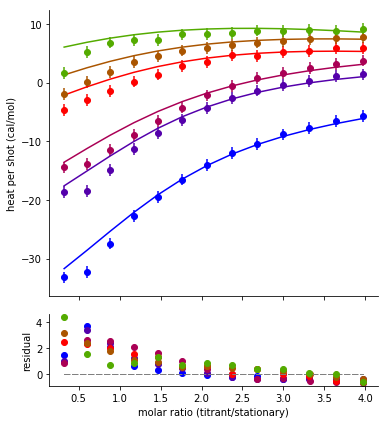

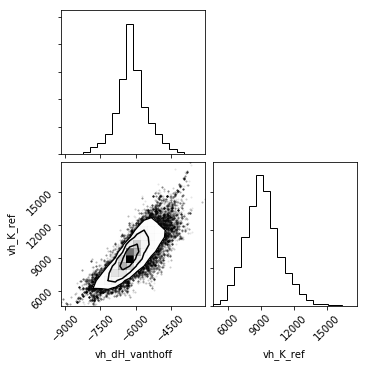

In [16]:
import numpy as np

# --------------------------------------------------------------------
# Create a global fitting instance
g1 = pytc.GlobalFit()
vh = pytc.global_connectors.VantHoff("vh")

#--------------------------------------------------------------------------------------------------

t5 = pytc.ITCExperiment("temp-dependence/5C.DH",pytc.indiv_models.SingleSite,shot_start=1,uncertainty=HEAT_UNCERTAINTY)
g1.add_experiment(t5)
g1.link_to_global(t5,"dH",vh.dH)
g1.link_to_global(t5,"K",vh.K)
g1.link_to_global(t5,"fx_competent","g_competent")


#--------------------------------------------------------------------------------------------------

t10 = pytc.ITCExperiment("temp-dependence/10C.DH",pytc.indiv_models.SingleSite,shot_start=1,uncertainty=HEAT_UNCERTAINTY)
g1.add_experiment(t10)
g1.link_to_global(t10,"dH",vh.dH)
g1.link_to_global(t10,"K",vh.K)
g1.link_to_global(t10,"fx_competent","g_competent")

#--------------------------------------------------------------------------------------------------

t17 = pytc.ITCExperiment("temp-dependence/17C.DH",pytc.indiv_models.SingleSite,shot_start=1,uncertainty=HEAT_UNCERTAINTY)
g1.add_experiment(t17)
g1.link_to_global(t17,"dH",vh.dH)
g1.link_to_global(t17,"K",vh.K)
g1.link_to_global(t17,"fx_competent","g_competent")

#--------------------------------------------------------------------------------------------------

t25 = pytc.ITCExperiment("temp-dependence/25C.DH",pytc.indiv_models.SingleSite,shot_start=1,uncertainty=HEAT_UNCERTAINTY)
g1.add_experiment(t25)
g1.link_to_global(t25,"dH",vh.dH)
g1.link_to_global(t25,"K",vh.K)
g1.link_to_global(t25,"fx_competent","g_competent")

#--------------------------------------------------------------------------------------------------

t30 = pytc.ITCExperiment("temp-dependence/30C.DH",pytc.indiv_models.SingleSite,shot_start=1,uncertainty=HEAT_UNCERTAINTY)
g1.add_experiment(t30)
g1.link_to_global(t30,"dH",vh.dH)
g1.link_to_global(t30,"K",vh.K)
g1.link_to_global(t30,"fx_competent","g_competent")

#--------------------------------------------------------------------------------------------------

t35 = pytc.ITCExperiment("temp-dependence/35C.DH",pytc.indiv_models.SingleSite,shot_start=1,uncertainty=HEAT_UNCERTAINTY)
g1.add_experiment(t35)
g1.link_to_global(t35,"dH",vh.dH)
g1.link_to_global(t35,"K",vh.K)
g1.link_to_global(t35,"fx_competent","g_competent")

g1.update_bounds("g_competent",(0.5,1.5))
g1.update_bounds("vh_K_ref",(1,np.inf))

# Do fit
F = pytc.fitters.BayesianFitter(num_steps=1000)
g1.fit(F)

# Show the results
fit, ax = g1.plot()
c = g1.corner_plot()
print(g1.fit_as_csv)

#### Fit to the VantHoffExtended global connector to extract change in heat capacity (one more param)
Titrations of recombinant human S100A14 with $ZnCl_{2}$ at $5$, $10$, $17$, $25$, $30$ and $35 ^{\circ}C$.  Concentrations were: $[protein] = 110\ \mu M$ and $[ZnCl_{2}]=200\ mM$.  Buffer was $25\ mM$ Trizma, $100\ mM$ NaCl, $pH\ 7.4$.  Buffer was treated with chelex and filtered to $0.22\ \mu m$.  Data collected using a GE ITC200. 

# Fit successful? True
# 2017-05-15 14:31:33.235397
# Units: cal/mol
# Fit type: bayesian
#   bayesian: Burn in: 0.1
#   bayesian: Final sample number: 90000
#   bayesian: Initial walker spread: 0.0001
#   bayesian: Num steps: 1000
#   bayesian: Num threads: 1
#   bayesian: Num walkers: 100
#   bayesian: Use ML guess: True
# AIC: 53.11935452838466
# AICc: 64.7125748673677
# BIC: 93.18340458210773
# F: 1547.1402257121713
# Rsq: 0.9975273436222725
# Rsq_adjusted: 0.9968787780149997
# df: 62
# ln(L): -9.55967726419233
# num_obs: 78
# num_param: 16
type,name,exp_file,value,stdev,bot95,top95,fixed,guess,lower_bound,upper_bound
global,vhe_K_ref,NA,1.76483e+04,3.73655e+03,1.10864e+04,2.62323e+04,False,1.00000e+00,1.00000e+00,inf
global,g_competent,NA,1.30618e+00,7.13970e-02,1.16067e+00,1.44726e+00,False,1.00000e+00,5.00000e-01,1.50000e+00
global,vhe_dH_ref,NA,-3.46581e+03,4.26014e+02,-4.39641e+03,-2.67730e+03,False,0.00000e+00,-inf,inf
global,vhe_dCp,NA,5.64617e+01,2.75033e+01,-3.74706e-01,1.

/usr/local/lib/python3.5/dist-packages/matplotlib/figure.py:1742: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


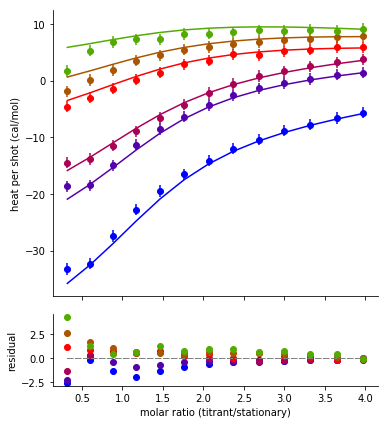

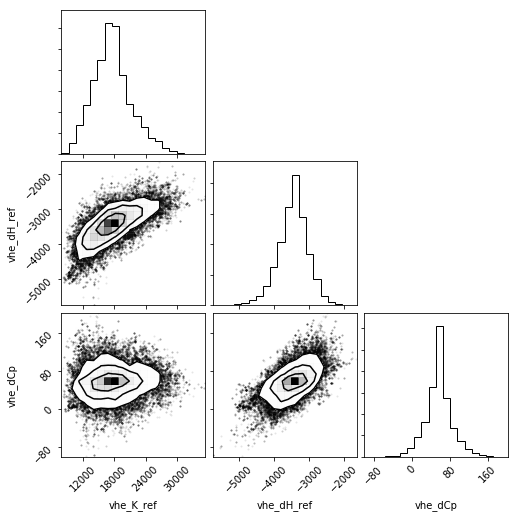

In [17]:
# --------------------------------------------------------------------
# Create a global fitting instance
g2 = pytc.GlobalFit()
vhe = pytc.global_connectors.VantHoffExtended("vhe")

#--------------------------------------------------------------------------------------------------

t5 = pytc.ITCExperiment("temp-dependence/5C.DH",pytc.indiv_models.SingleSite,shot_start=1,uncertainty=HEAT_UNCERTAINTY)
g2.add_experiment(t5)
g2.link_to_global(t5,"dH",vhe.dH)
g2.link_to_global(t5,"K",vhe.K)
g2.link_to_global(t5,"fx_competent","g_competent")


#--------------------------------------------------------------------------------------------------

t10 = pytc.ITCExperiment("temp-dependence/10C.DH",pytc.indiv_models.SingleSite,shot_start=1,uncertainty=HEAT_UNCERTAINTY)
g2.add_experiment(t10)
g2.link_to_global(t10,"dH",vhe.dH)
g2.link_to_global(t10,"K",vhe.K)
g2.link_to_global(t10,"fx_competent","g_competent")

#--------------------------------------------------------------------------------------------------

t17 = pytc.ITCExperiment("temp-dependence/17C.DH",pytc.indiv_models.SingleSite,shot_start=1,uncertainty=HEAT_UNCERTAINTY)
g2.add_experiment(t17)
g2.link_to_global(t17,"dH",vhe.dH)
g2.link_to_global(t17,"K",vhe.K)
g2.link_to_global(t17,"fx_competent","g_competent")

#--------------------------------------------------------------------------------------------------

t25 = pytc.ITCExperiment("temp-dependence/25C.DH",pytc.indiv_models.SingleSite,shot_start=1,uncertainty=HEAT_UNCERTAINTY)
g2.add_experiment(t25)
g2.link_to_global(t25,"dH",vhe.dH)
g2.link_to_global(t25,"K",vhe.K)
g2.link_to_global(t25,"fx_competent","g_competent")

#--------------------------------------------------------------------------------------------------

t30 = pytc.ITCExperiment("temp-dependence/30C.DH",pytc.indiv_models.SingleSite,shot_start=1,uncertainty=HEAT_UNCERTAINTY)
g2.add_experiment(t30)
g2.link_to_global(t30,"dH",vhe.dH)
g2.link_to_global(t30,"K",vhe.K)
g2.link_to_global(t30,"fx_competent","g_competent")

#--------------------------------------------------------------------------------------------------

t35 = pytc.ITCExperiment("temp-dependence/35C.DH",pytc.indiv_models.SingleSite,shot_start=1,uncertainty=HEAT_UNCERTAINTY)
g2.add_experiment(t35)
g2.link_to_global(t35,"dH",vhe.dH)
g2.link_to_global(t35,"K",vhe.K)
g2.link_to_global(t35,"fx_competent","g_competent")

g2.update_bounds("g_competent",(0.5,1.5))
g2.update_bounds("vhe_K_ref",(1,np.inf))

# Do fit
F = pytc.fitters.BayesianFitter(num_steps=1000)
g2.fit(F)

# Show the results
fit, ax = g2.plot()
c = g2.corner_plot()
print(g2.fit_as_csv)


#### Use util.choose_model to select between the two models

In [18]:
pytc.util.compare_models(g1,g2)

{'AIC': (0, array([ 0.62667269,  0.37332731])),
 'AICc': (0, array([ 0.77110815,  0.22889185])),
 'BIC': (0, array([ 0.84505392,  0.15494608]))}